# Marcelo Villalba

## HomeWork 2 EDA, Data Visualization and Linear Regression Model 

# Due on 9/30/2019 mid-night

## Late Policy: Take off 50% after one day, 80% after two days

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading our MPG3 dataset

In [2]:
data = pd.read_csv("mpg3.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


In [3]:
data.shape

(405, 9)

# Question 1: Check to see if there are any missing values. Fix the missing values by imputing value from the mean. After fixing missing values, you should still have 405 rows

In [4]:
data.isnull().sum()

mpg             1
cylinders       0
displacement    0
horsepower      6
weight          1
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,404.000000,405.000000,405.000000,399.000000,404.000000,405.000000,405.000000
mean,23.645545,5.493827,194.504938,105.593985,3020.866337,15.521481,75.987654
std,8.465607,1.847687,105.231828,42.317959,1282.513294,2.792380,3.746595
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2227.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,267.000000,129.000000,3614.750000,17.100000,79.000000
max,90.000000,20.000000,455.000000,450.000000,22340.000000,24.800000,85.000000


In [6]:
mpgmean = 23.65
hpmean=105.6
weightmean=3020.87

In [7]:
data.mpg.fillna(mpgmean, inplace= True)
data.horsepower.fillna(hpmean, inplace = True)
data.weight.fillna(weightmean, inplace = True)

In [8]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

**There are no more null values**

In [9]:
data.shape

(405, 9)

# Question 2 : Use Boxplot to see if there are any outliers on ALL of the numerical fields (Hint you should have 402 rows now after outliers removal)

**Checking for mpg outliers**

<function matplotlib.pyplot.show(*args, **kw)>

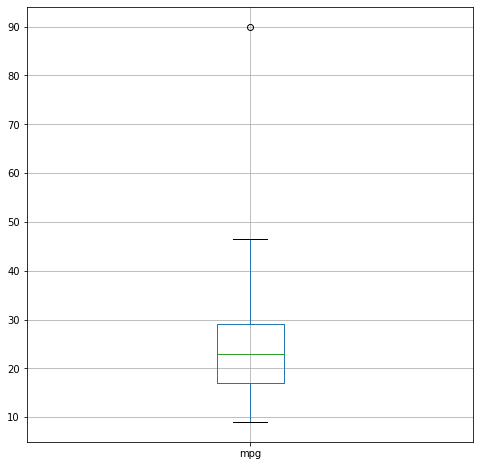

In [10]:
plt.figure(figsize =(8,8))
data.boxplot("mpg")
plt.show

In [11]:
data[data.mpg >80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
10,90.0,8,451.0,450.0,2555.0,8.0,85,usa,pontiac turbo


In [12]:
data= data[ data.mpg < 80]
data.shape

(404, 9)

**The mpg outlier row was removed**

**Checking for cylinders ourliers**

<function matplotlib.pyplot.show(*args, **kw)>

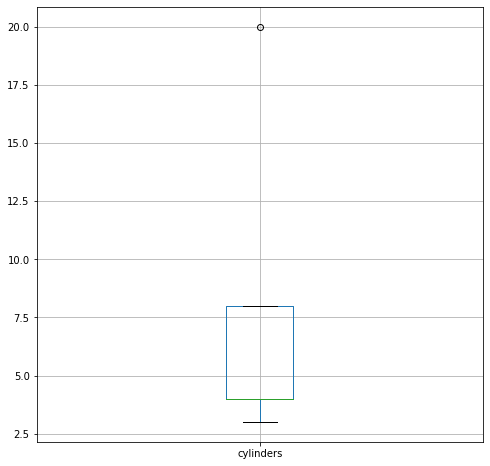

In [13]:
plt.figure(figsize =(8,8))
data.boxplot("cylinders")
plt.show

In [14]:
data[data.cylinders > 8]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
142,17.0,20,303.0,140.0,4141.0,14.0,74,usa,ford gran torino 2


In [15]:
data = data[data.cylinders <19]

In [16]:
data.shape

(403, 9)

**outlier removed**

<function matplotlib.pyplot.show(*args, **kw)>

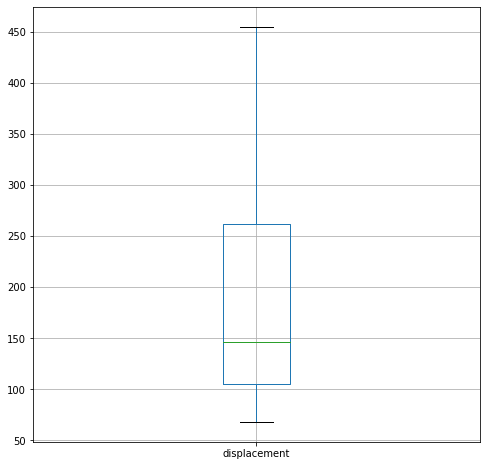

In [17]:
plt.figure(figsize =(8,8))
data.boxplot("displacement")
plt.show

**No outliers in displacement**

<function matplotlib.pyplot.show(*args, **kw)>

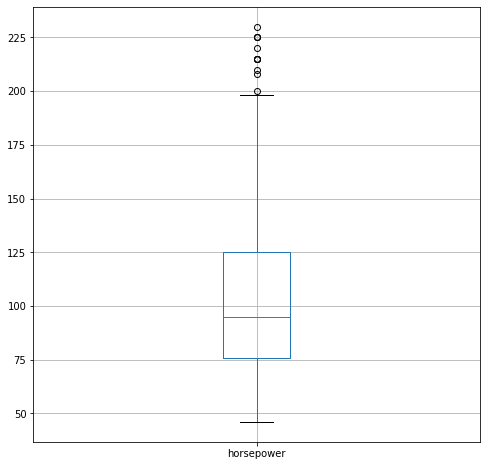

In [18]:
plt.figure(figsize = (8,8))
data.boxplot("horsepower")
plt.show

**Multiple outliers...but will keep them as 225hp is possible. Also if removed we will have less than 402 rows**

<function matplotlib.pyplot.show(*args, **kw)>

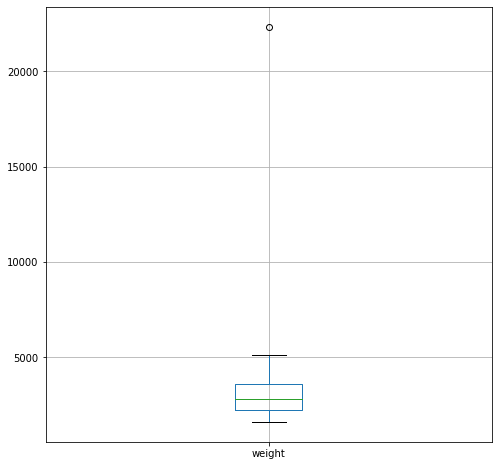

In [19]:
plt.figure(figsize = (8,8))
data.boxplot("weight")
plt.show

In [20]:
data = data[data.weight<20000]

In [21]:
data.shape

(402, 9)

# Question 3 : Remove any duplicates rows. Hint after removal, you should have 400 rows now

### Show number of rows before

In [22]:

print("Before duplicates removal: ", data.shape)

Before duplicates removal:  (402, 9)


### Type your code here to remove duplicated rows

In [23]:
data.drop_duplicates()
data= data.drop_duplicates()

### Show number of rows after.

In [24]:
data.shape

(400, 9)

# Question 4: Create a pair plot

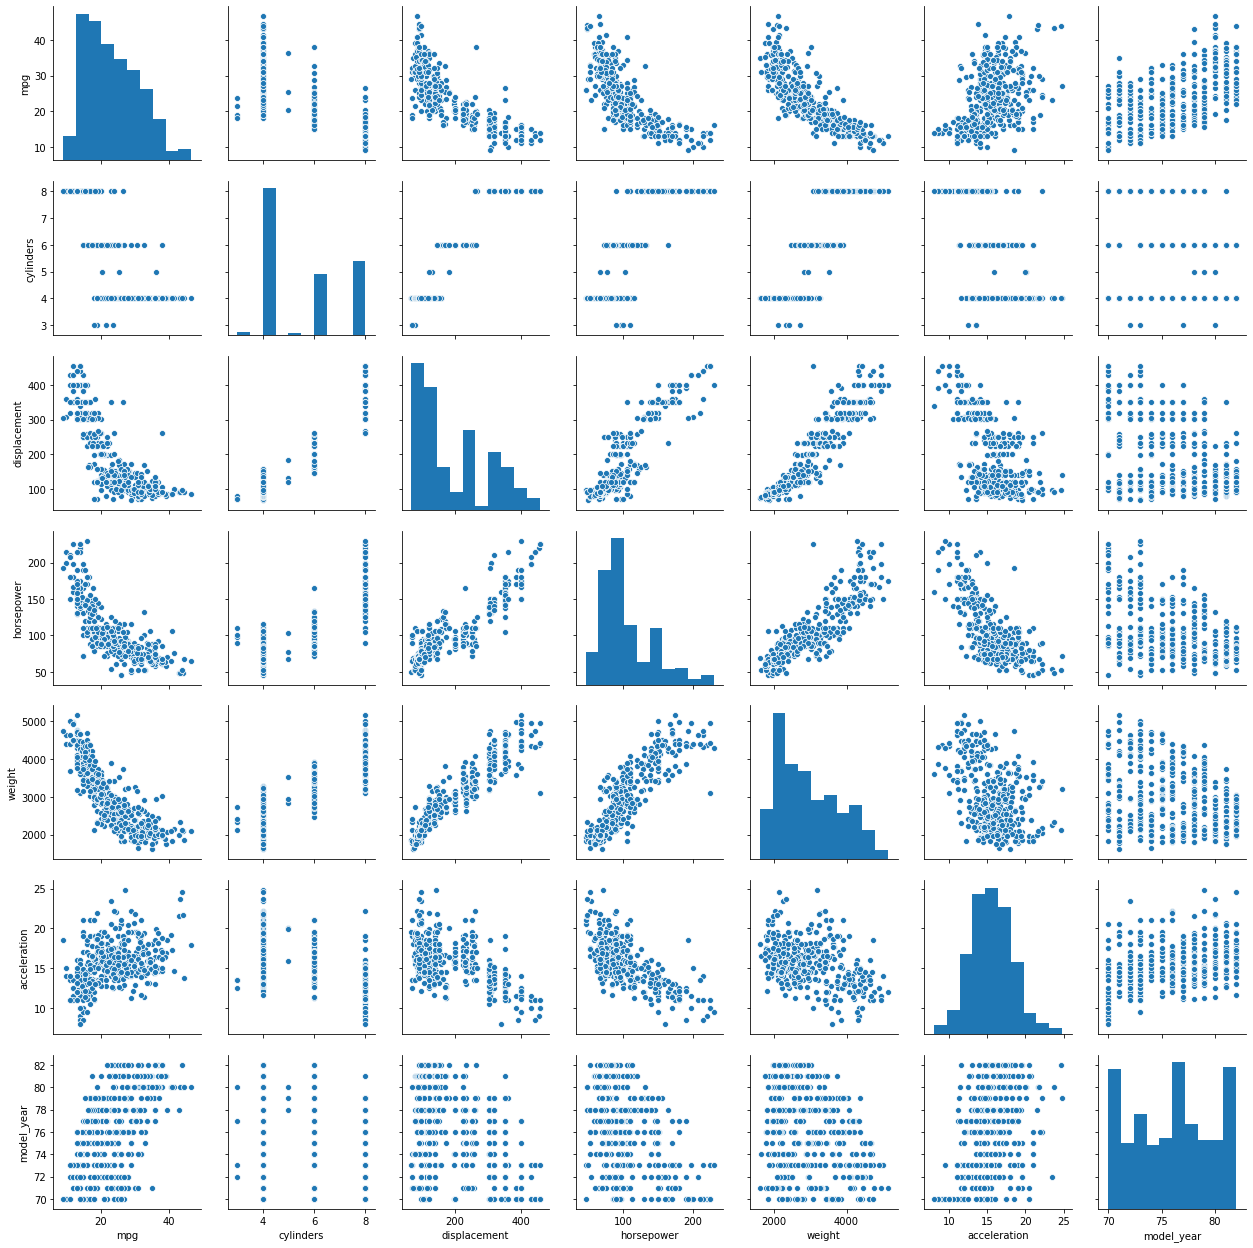

In [25]:
sns.pairplot(data)

# Question 5: Create a FacetGrid of a scatter plot of mpg vs weight for different country

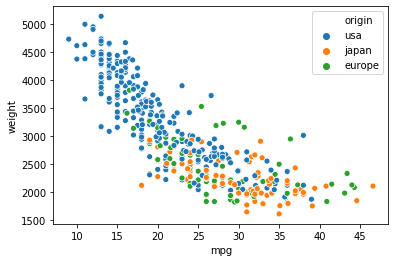

In [26]:
sns.scatterplot(x="mpg", y="weight", hue="origin", data=data)

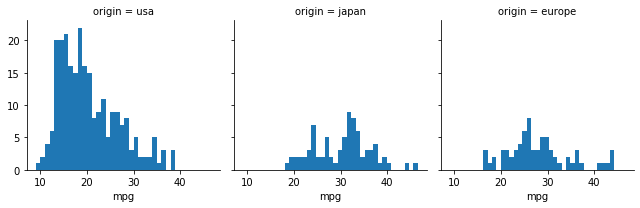

In [27]:
g = sns.FacetGrid(data, col = 'origin')
g = g.map(plt.hist, 'mpg', bins=30)

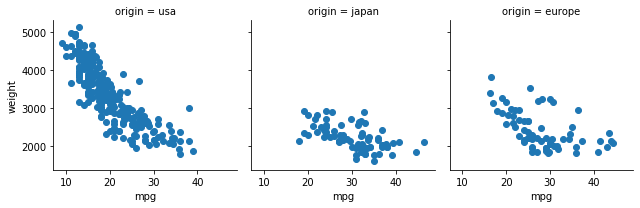

In [28]:
q = sns.FacetGrid(data, col = 'origin')
q = (q.map(plt.scatter, "mpg", "weight"))

# Now Load the adult income dataset and do some EDA and answer the following questions based on the Adult income dataset

In [29]:
adult = pd.read_csv("adult.data.csv")
adult.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [30]:
adult.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [31]:
print(adult.shape)
adult.describe()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Question 6 : Which two martial-status is most common

In [32]:
adult.groupby(by = 'marital-status').count().sort_values(by = "marital-status", ascending = True)

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
marital-status,,,,,,,,,,,,,,
Divorced,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443,4443
Married-AF-spouse,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Married-civ-spouse,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976,14976
Married-spouse-absent,418,418,418,418,418,418,418,418,418,418,418,418,418,418
Never-married,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683
Separated,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
Widowed,993,993,993,993,993,993,993,993,993,993,993,993,993,993


**The 1st most common is Married-civ-spouse 14976 and the second is Never-married 10683**

In [33]:
msg = adult["marital-status"]
msg.head()

0         Never-married
1    Married-civ-spouse
2              Divorced
3    Married-civ-spouse
4    Married-civ-spouse
Name: marital-status, dtype: object

# Question 7: Plot the age distribution broken down by different martial-status using a FacetGrid

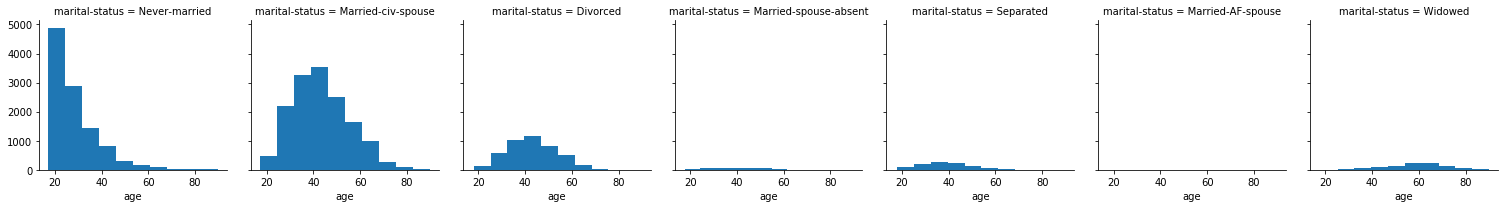

In [34]:
ad = sns.FacetGrid(adult, col = 'marital-status')
ad = ad.map(plt.hist, 'age', bins=10)

# Question 8: Create a Facet Grid for fnlwgt against age broken down by race and sex. You should have 10 sub-plots

# Now Load the housing data and answer all the remaining questions based on the housing dataset

In [35]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861322,7.009188,4.09,23086.80050,1059033.558,208 Michael Ferry Apt. 674
1,Laurabury,"NE 37010-5101""",NaN,NaN,NaN,NaN,NaN
2,79248.64245,6.002899808,6.730821,3.09,40173.07217,1505890.915,188 Johnson Views Suite 079
3,Lake Kathleen,"CA 48958""",NaN,NaN,NaN,NaN,NaN
4,61287.06718,5.86588984,8.512727,5.13,36882.15940,1058987.988,9127 Elizabeth Stravenue


**FIRST I WILL DO SOME EDA**

In [36]:
housing = housing.dropna()
housing.tail(5)

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
9990,60567.94414,7.830362444,6.137356,3.46,22837.36103,1060193.786,USNS Williams
9992,78491.27543,6.999134987,6.576763,4.02,25616.11549,1482617.729,"PSC 9258, Box 8489"
9994,63390.68689,7.250590615,4.805081,2.13,33266.14549,1030729.583,4215 Tracy Garden Suite 076
9996,68001.33124,5.534388416,7.130144,5.44,42625.62016,1198656.872,USS Wallace
9998,65510.5818,5.992305307,6.792336,4.07,46501.28380,1298950.480,37778 George Ridges Apt. 509


# a scatter plot comparing num_children and num_pets

**There are no such columns to compare**

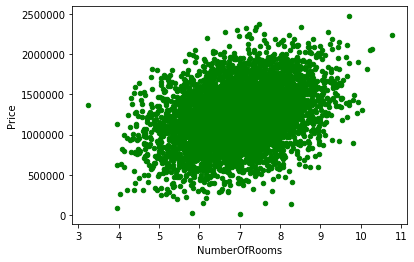

In [37]:
housing.plot(kind='scatter', x = "NumberOfRooms", y = "Price", color = "green")

# Question 9: Use a pair plot or individual scatter plots, pick ONE variable that best explains house price

In [38]:
housing.corr()

,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
NumberOfRooms,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.462695,1.000000,-0.022168,0.171071
Population,0.002040,-0.022168,1.000000,0.408556
Price,0.335664,0.171071,0.408556,1.000000


**According to correlation the highest contributing factor to price is population**

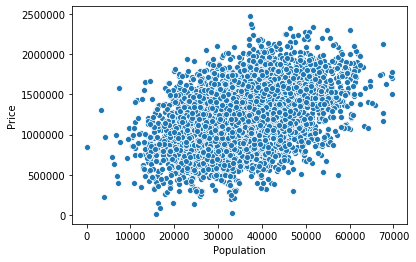

In [39]:
sns.scatterplot(x='Population', y ='Price', data =housing)

In [40]:
housing.shape

(5000, 7)

**The graph agrees**

# Question 10:  Use that variable to build a one-variable Linear Regression model of the house price. Make sure you split the data between Training and Testing set first, Save 20% as your testing data

In [42]:
Xarray = housing['Population'].values
Yarray = housing['Price'].values

In [43]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [44]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * housing.shape[0])

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)
4000.0


In [46]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [47]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
Y_pred = model1.predict(X)

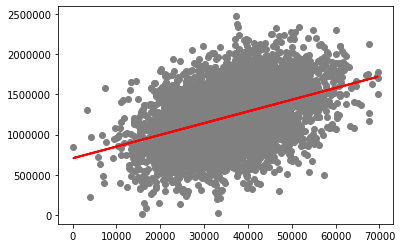

In [49]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

**THis is model 1 tested with 20% of the data**

# Question 11: Now do a 10-fold Cross Validation of your model. Does your model pass cross validation?

In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * housing.shape[0])

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)
4000.0


In [53]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)
print(model2.intercept_)
print(model2.coef_)

[706487.29392764]
[[14.50763194]]


In [55]:
print(model1.intercept_)
print(model1.coef_)

[706439.74487273]
[[14.53489502]]


In [56]:
print(model2.intercept_)
print(model2.coef_)

[706487.29392764]
[[14.50763194]]


In [57]:
Y_pred = model2.predict(X_test)

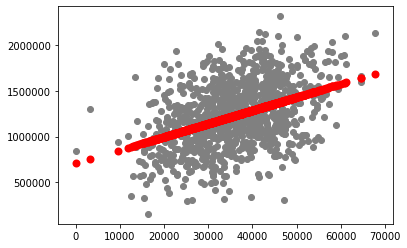

In [58]:
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

**THE model does pass cross validation**

# Question 12: Now pick ONE more variable in addition to the variable you choose from Question 9 and build a two-variables Linear Regression model of the house price. Make sure you split the data into training and testing set first

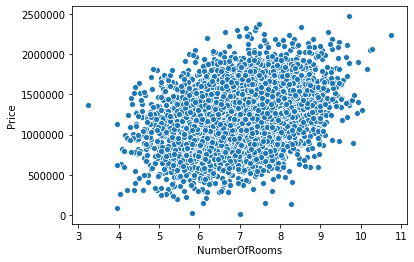

In [59]:
sns.scatterplot(x='NumberOfRooms', y ='Price', data =housing)

In [60]:
Xarray2 = housing['NumberOfRooms'].values
Yarray2 = housing['Price'].values

In [62]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * housing.shape[0])

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)
4000.0


In [68]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [64]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
print(model3.intercept_)
print(model3.coef_)

[706439.74487273]
[[14.53489502]]


In [66]:
Y_pred = model3.predict(X_test)

ValueError: x and y must have same first dimension, but have shapes (5000, 1) and (1000, 1)

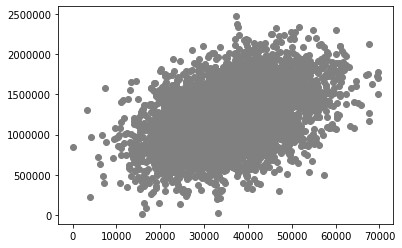

In [69]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

# Question 13: Do a 10-fold Cross Validation of your two-variable model. Does your model pass cross validation?

In [ ]:
# Show your work here